In [1]:
import pandas as pd
from prophet import Prophet

df = pd.read_csv('medium_posts.csv')

df['published_date'] = pd.to_datetime(df['published']).dt.date

df_by_day = df['published_date'].value_counts().sort_index()

df_by_day = df_by_day.iloc[2:]

df_by_day = df_by_day.to_frame()
df_by_day['ds'] = df_by_day.index

df_by_day.rename(columns={"published_date":"y"}, inplace=True)

df_by_day.head()

,y,ds
2003-09-14,1,2003-09-14
2004-04-04,1,2004-04-04
2004-04-16,1,2004-04-16
2005-09-12,1,2005-09-12
2006-02-19,1,2006-02-19


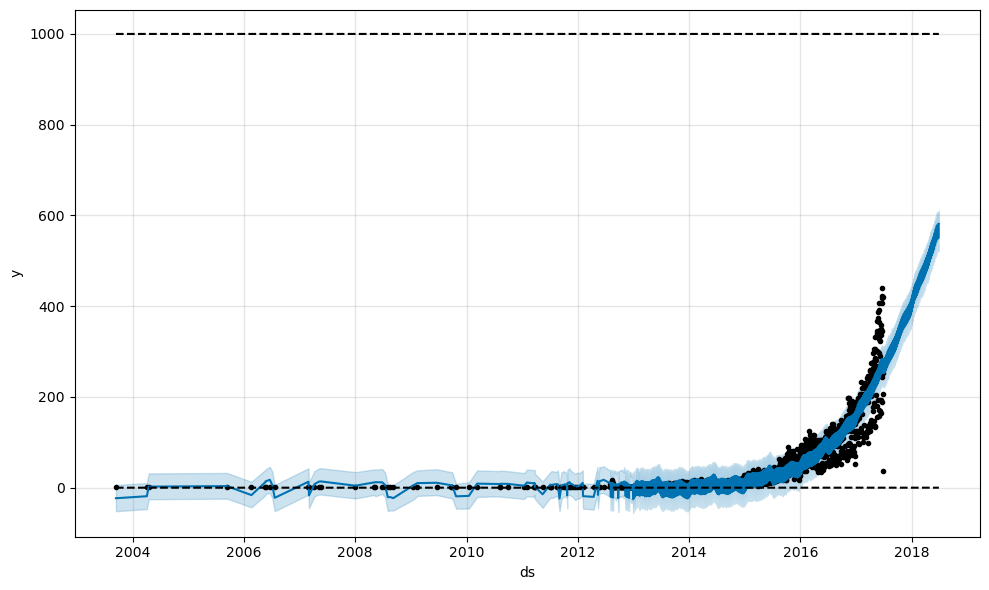

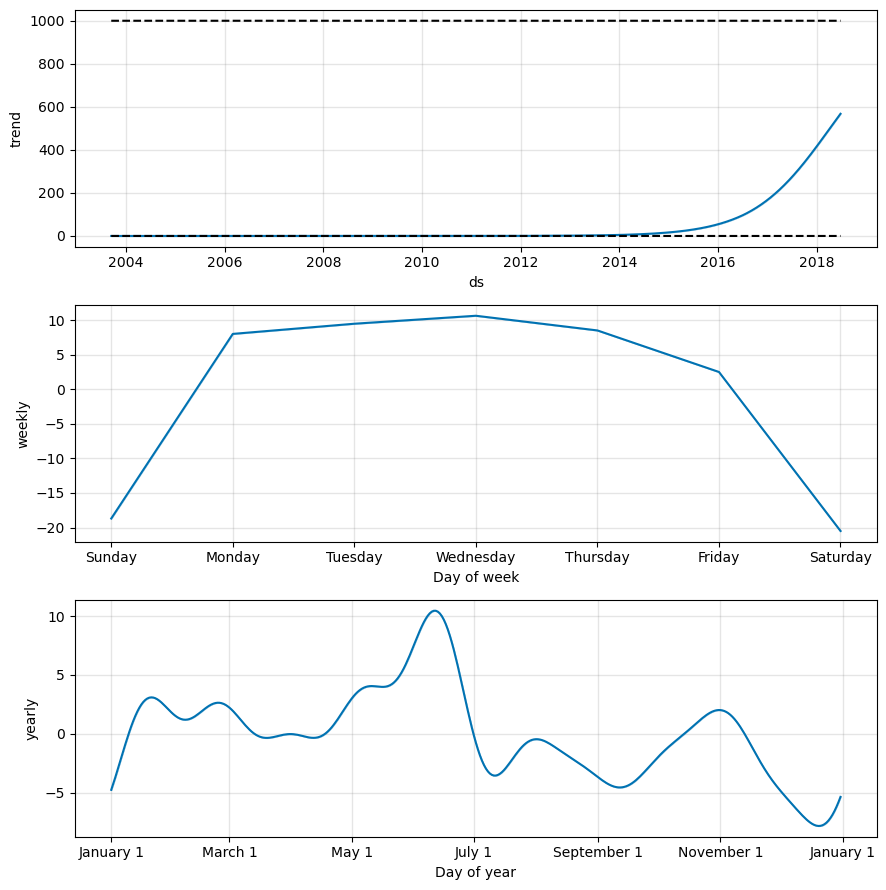

In [3]:
import logging
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)

df_by_day['cap'] = 1000
df_by_day['floor'] = 0

m = Prophet(growth='logistic')
m.fit(df_by_day)
future = m.make_future_dataframe(periods=365)
future['cap'] = 1000
future['floor'] = 0

forecast = m.predict(future)

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

In [4]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

  0%|          | 0/22 [00:00<?, ?it/s]

/home/jsowa/anaconda3/envs/prophetenv/lib/python3.11/site-packages/prophet/forecaster.py:1295: RuntimeWarning: overflow encountered in exp
  return cap / (1 + np.exp(-k_t * (t - m_t)))
/home/jsowa/anaconda3/envs/prophetenv/lib/python3.11/site-packages/prophet/forecaster.py:1295: RuntimeWarning: overflow encountered in exp
  return cap / (1 + np.exp(-k_t * (t - m_t)))
/home/jsowa/anaconda3/envs/prophetenv/lib/python3.11/site-packages/prophet/forecaster.py:1738: RuntimeWarning: overflow encountered in exp
  sample_trends = cap / (1 + np.exp(-k_t * (t_time - m_t)))
/home/jsowa/anaconda3/envs/prophetenv/lib/python3.11/site-packages/prophet/forecaster.py:1295: RuntimeWarning: overflow encountered in exp
  return cap / (1 + np.exp(-k_t * (t - m_t)))
/home/jsowa/anaconda3/envs/prophetenv/lib/python3.11/site-packages/prophet/forecaster.py:1295: RuntimeWarning: overflow encountered in exp
  return cap / (1 + np.exp(-k_t * (t - m_t)))
/home/jsowa/anaconda3/envs/prophetenv/lib/python3.11/site-pac

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,198.352447,14.083765,10.576105,0.921392,0.780428,1.098383,0.280535
1,41 days,205.076664,14.320498,10.682090,0.920954,0.789205,1.096888,0.268882
2,42 days,206.581934,14.372958,10.676271,0.919704,0.789205,1.095467,0.271903
3,43 days,204.530916,14.301431,10.640959,0.920625,0.789205,1.095823,0.268019
4,44 days,201.902314,14.209233,10.577887,0.915714,0.789205,1.093308,0.271903


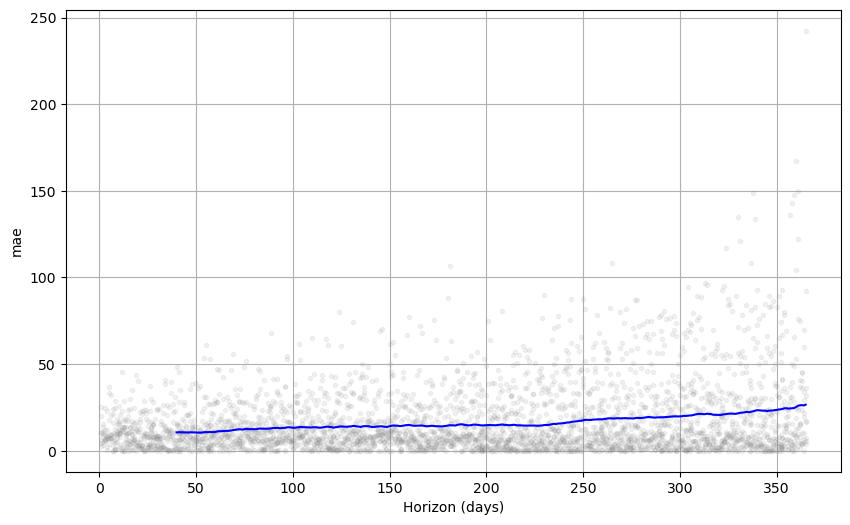

In [5]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')